# Compare and evaluate the performance of different models

In [3]:
# load in the json files

import json
import os
import sys
import re

# load in the json files
def load_json(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

cr_macro = load_json('./outputs/costarica_resnet_v2.0_macro-accuracy.json')
cr_micro = load_json('./outputs/costarica_resnet_v2.0_micro-accuracy.json')
cr_taxon = load_json('./outputs/costarica_resnet_v2.0_taxon-accuracy.json')

In [44]:
cr_taxon

{'Pytorch': {'About': '[Top1 Accuracy, Total Test Points] for each taxon at different ranks',
  'family': {'Tortricidae': [96.34, 465],
   'Nolidae': [96.25, 80],
   'Erebidae': [95.41, 1875],
   'Notodontidae': [94.96, 397],
   'Thyrididae': [94.64, 112],
   'Uraniidae': [94.63, 149],
   'Geometridae': [94.58, 1051],
   'Sphingidae': [94.29, 175],
   'Crambidae': [94.02, 535],
   'Euteliidae': [93.33, 150],
   'Limacodidae': [93.33, 150],
   'Noctuidae': [92.73, 385],
   'Lasiocampidae': [92.38, 210],
   'Depressariidae': [88.17, 93]},
  'genus': {'Titya': [100.0, 65],
   'Aleuron': [100.0, 25],
   'Pteroodes': [98.26, 115],
   'Microthyris': [98.0, 150],
   'Thagona': [98.0, 150],
   'Nystalea': [97.33, 150],
   'Syngamilyta': [97.33, 150],
   'Pero': [97.33, 150],
   'Motya': [96.25, 80],
   'Netechma': [96.0, 150],
   'Oospila': [96.0, 150],
   'Oxydia': [96.0, 150],
   'Stenoma': [95.83, 24],
   'Darceta': [95.65, 23],
   'Eriosocia': [95.33, 150],
   'Tautobriga': [95.33, 150],
 

In [42]:
# plot the results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

ValueError: context must be in paper, notebook, talk, poster

9


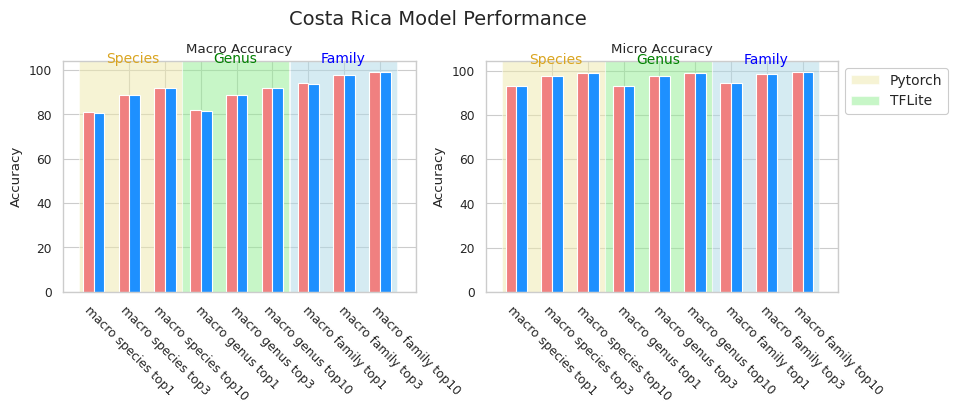

In [123]:
cr_macro

# For the two entries in the dictionary cr_macro, plot a bar chart to compare the values

# get the Pytorch values
pytorch_macro = cr_macro['Pytorch']
tflite_macro = cr_macro['TFLite']
pytorch_micro = cr_micro['Pytorch']
tflite_micro = cr_micro['TFLite']

# subplots with 2 cols, 1 row
fig, ax = plt.subplots(1, 2, figsize=(10,3))

# add yellow box over the first three bars
ax[0].axvspan(-0.25, 2.62, facecolor='palegoldenrod', alpha=0.5)
ax[0].axvspan(2.63, 5.62, facecolor='lightgreen', alpha=0.5)
ax[0].axvspan(5.63, 8.62, facecolor='lightblue', alpha=0.5)

# add text to the yellow box
ax[0].text(1.25, 105, 'Species', ha='center', va='center', fontsize=10, color='goldenrod')
ax[0].text(4.12, 105, 'Genus', ha='center', va='center', fontsize=10, color='green')
ax[0].text(7.12, 105, 'Family', ha='center', va='center', fontsize=10, color='blue')

# add a bar series for both pytorch and tflite, one to each side of the x-axis
ax[0].bar(np.arange(len(pytorch_macro)), list(pytorch_macro.values()), width=0.3, 
          align='center', color='lightcoral')
ax[0].bar(np.arange(len(tflite_macro))+0.3, list(tflite_macro.values()), 
          width=0.3, align='center', color='dodgerblue')


# add yellow box over the first three bars
ax[1].axvspan(-0.25, 2.62, facecolor='palegoldenrod', alpha=0.5)
ax[1].axvspan(2.63, 5.62, facecolor='lightgreen', alpha=0.5)
ax[1].axvspan(5.63, 8.62, facecolor='lightblue', alpha=0.5)

# add text to the yellow box
ax[1].text(1.25, 105, 'Species', ha='center', va='center', fontsize=10, color='goldenrod')
ax[1].text(4.12, 105, 'Genus', ha='center', va='center', fontsize=10, color='green')
ax[1].text(7.12, 105, 'Family', ha='center', va='center', fontsize=10, color='blue')

ax[1].bar(np.arange(len(pytorch_micro)), list(pytorch_micro.values()), width=0.3, align='center', color='lightcoral')
ax[1].bar(np.arange(len(tflite_micro))+0.3, list(tflite_micro.values()), width=0.3, align='center', color='dodgerblue')

print(len(pytorch_macro.keys()))

# add the x axis ticks and labels
labs = [re.sub("_", " " , x) for x in list(pytorch_macro.keys())]
ax[0].set_xticks(np.arange(len(pytorch_macro.keys()))+1.15)
ax[0].set_xticklabels(labs, rotation=-45, ha='center')



ax[1].set_xticks(np.arange(len(pytorch_macro.keys()))+1.15)
ax[1].set_xticklabels(labs, rotation=-45, ha='center')


#ax[0].set_yticks(size=10)
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Accuracy')
ax[0].set_title('Macro Accuracy')
ax[1].set_title('Micro Accuracy')

# add a legend for the plot for pytorch and tflite and define the colors
ax[1].legend(['Pytorch', 'TFLite'], loc='upper left', bbox_to_anchor=(1,1), 
              facecolor='white', framealpha=1, fontsize=10)

# add a master title
plt.suptitle('Costa Rica Model Performance', fontsize=14, y=1.05)

plt.show()


In [150]:
import pandas as pd
# get the Pytorch values
pytorch_macro = cr_macro['Pytorch']
tflite_macro = cr_macro['TFLite']
pytorch_micro = cr_micro['Pytorch']
tflite_micro = cr_micro['TFLite']

# create a df with a column for pytorch and tflite, and rows for each value in the dict
df = pd.DataFrame(columns=['Value', 'Model', 'Type'])
for k in pytorch_macro.keys():
    df = pd.concat([df, pd.DataFrame([[pytorch_macro[k], "Pytorch", "Macro"]], columns=['Value', 'Model', 'Type'], index=[k])])
    df = pd.concat([df, pd.DataFrame([[tflite_macro[k], "TFLite", "Macro"]], columns=['Value', 'Model', 'Type'], index=[k])])
    df = pd.concat([df, pd.DataFrame([[pytorch_micro[re.sub('macro', 'micro', k)], "Pytorch", "Micro"]], columns=['Value', 'Model', 'Type'], index=[re.sub('macro', 'micro', k)])])
    df = pd.concat([df, pd.DataFrame([[tflite_micro[re.sub('macro', 'micro', k)], "TFLite", "Micro"]], columns=['Value', 'Model', 'Type'], index=[re.sub('macro', 'micro', k)])])

    
# add a column for species, genus, family deepending on the index
df['Taxon'] = df.index.str.split('_').str[1]
df['Measure'] = df.index.str.split('_').str[2]
df





,Value,Model,Type,Taxon,Measure
macro_species_top1,80.95,Pytorch,Macro,species,top1
macro_species_top1,80.55,TFLite,Macro,species,top1
micro_species_top1,93.34,Pytorch,Micro,species,top1
micro_species_top1,93.22,TFLite,Micro,species,top1
macro_species_top3,88.95,Pytorch,Macro,species,top3
macro_species_top3,88.94,TFLite,Macro,species,top3
micro_species_top3,97.53,Pytorch,Micro,species,top3
micro_species_top3,97.51,TFLite,Micro,species,top3
macro_species_top10,91.93,Pytorch,Macro,species,top10
macro_species_top10,91.94,TFLite,Macro,species,top10


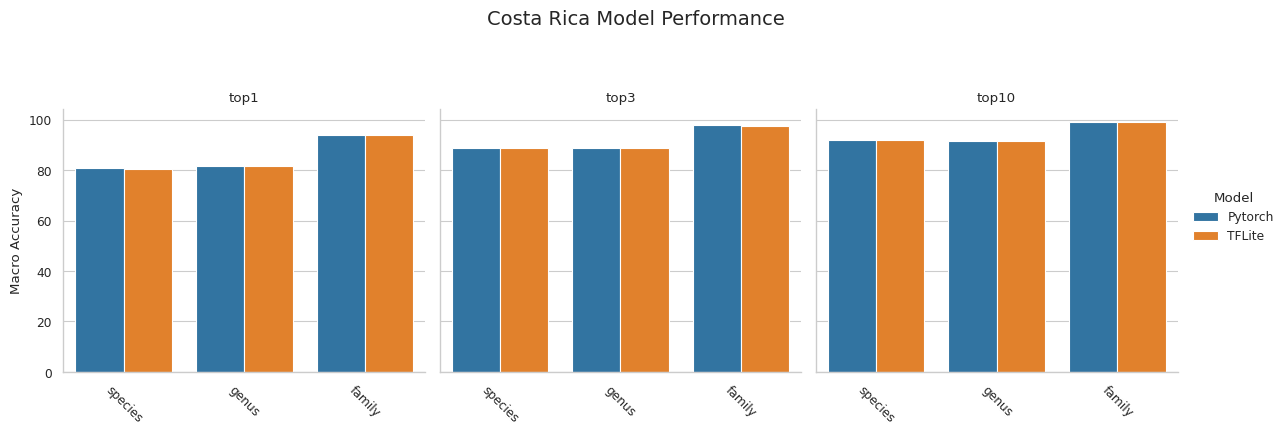

In [156]:
# set up seaborn mutiplots
sns.set_style('whitegrid')
sns.set_context('paper')

# plot results facet by taxon, and model
g = sns.catplot(x='Taxon', y='Value', hue='Model', col='Measure', data=df.loc[df['Type']=='Macro', ], kind='bar', height=4, aspect=1)
g.set_xticklabels(rotation=-45)
g.set_titles('{col_name}')
g.set_axis_labels('', 'Macro Accuracy')
g.fig.suptitle('Costa Rica Model Performance', fontsize=14, y=1.05)
g.fig.subplots_adjust(top=0.8)
plt.show()

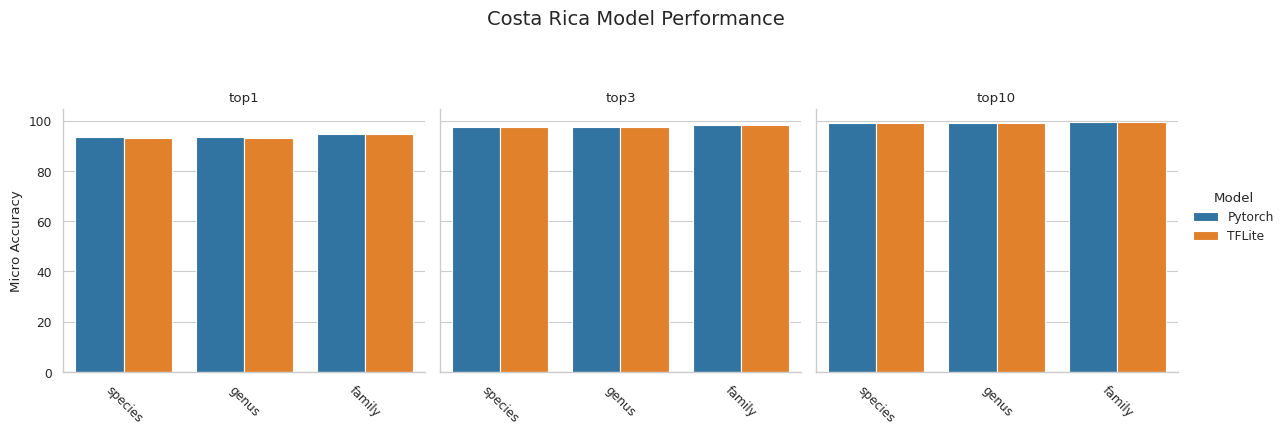

In [157]:
# set up seaborn mutiplots
sns.set_style('whitegrid')
sns.set_context('paper')

# plot results facet by taxon, and model
g = sns.catplot(x='Taxon', y='Value', hue='Model', col='Measure', data=df.loc[df['Type']=='Micro', ], kind='bar', height=4, aspect=1)
g.set_xticklabels(rotation=-45)
g.set_titles('{col_name}')
g.set_axis_labels('', 'Micro Accuracy')
g.fig.suptitle('Costa Rica Model Performance', fontsize=14, y=1.05)
g.fig.subplots_adjust(top=0.8)
plt.show()